# Part 1

In [ ]:

#import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

In [3]:
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)



# Load and Assess the Data Structure

In [5]:
# Load dataset into pandas
df = pd.read_csv("Customer Churn new.csv")  

#data dimensions
print(df.shape)

# Display the first few rows
df.head()

(10000, 11)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,EstimatedSalary,Exited
0,747,15787619,Hsieh,844,France,Male,18,2,160980.03,145936.28,0
1,1620,15770309,McDonald,656,France,Male,18,10,151762.74,127014.32,0
2,1679,15569178,Kharlamov,570,France,Female,18,4,82767.42,71811.90,0
3,2022,15795519,Vasiliev,716,Germany,Female,18,3,128743.80,197322.13,0
4,2137,15621893,Bellucci,727,France,Male,18,4,133550.67,46941.41,0


In [6]:
df.describe(include ='number')

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,199992.480000,1.000000


In [7]:
#check feature data types
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Exited'], float64: ['Balance', 'EstimatedSalary'], object: ['Surname', 'Geography', 'Gender']}

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 859.5+ KB


In [9]:
#check for any missing values
df.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
EstimatedSalary    False
Exited             False
dtype: bool

In [10]:
#Understanding string data types
df.describe(include = [object])

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


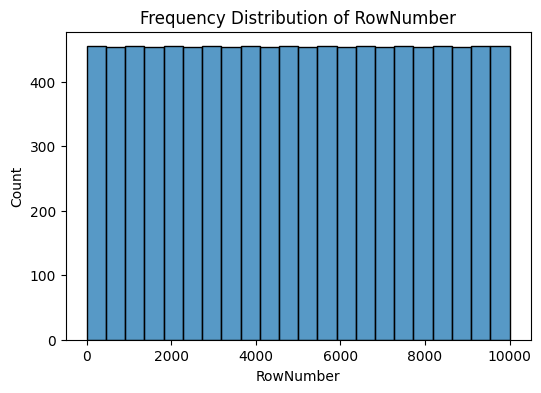

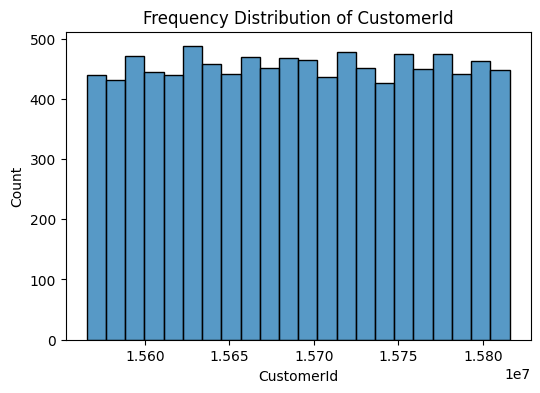

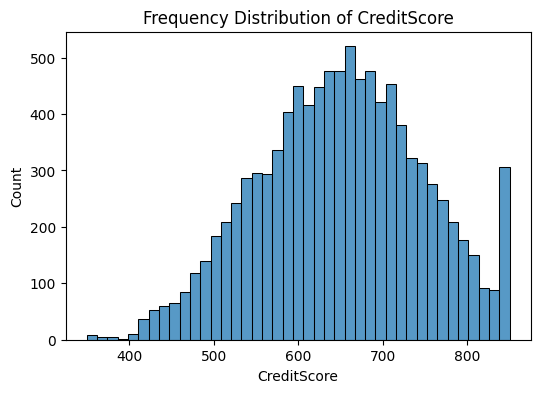

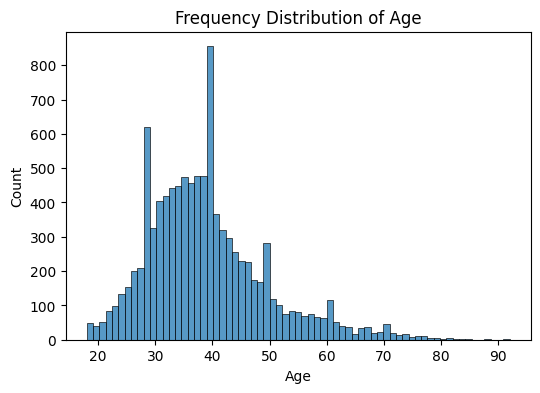

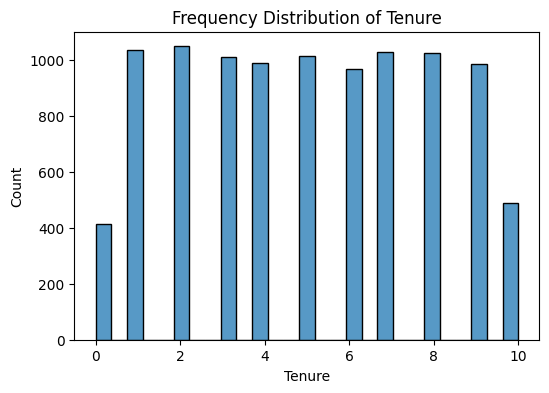

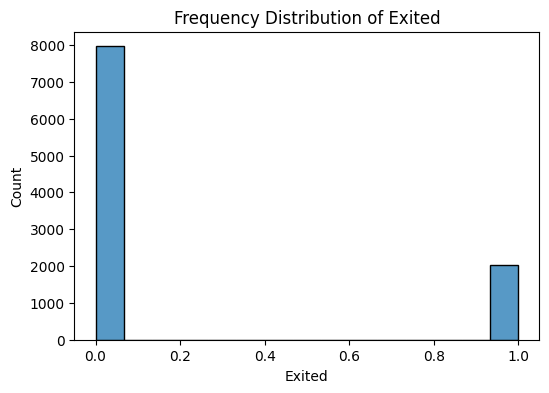

In [11]:
#understanding discrete numeric data

for col in df.columns:
    if df[col].dtypes == 'int64':
        plt.figure(figsize=(6, 4))
        sns.histplot( x= df[col])
        plt.title(f'Frequency Distribution of {col}')
        [plt.show]
    else:
        continue


In [12]:
df['Tenure'].value_counts(ascending= False)

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

In [13]:
df['Geography'].value_counts(ascending= False)

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

Gender and Georgraphy can be considred categorical features
1. Gender : onluy 2 unique values ; Male and Female
2. Geography : only 3 unique values ; France, Germany, Space
3. Tenure: ordianl nature, with each number represent years with company
3. Exited: target value, two unique values, 1 & 0s represent churn / no churn


The other data types are appropriate
1. Balance and Estimated Salary : Float is ideal for these monetary values
2. Age, Credit Score: these are discrete values so integer is ideal data type for these

In [14]:
def convert_to_categorifcal(df,columns):
    '''Convert identified columns to categorical data type'''
    for col in columns:
        df[col] = df[col].astype('category')

    return df

In [15]:
columns = ['Geography','Gender','Exited']

convert_to_categorifcal(df, columns)

df.dtypes

RowNumber             int64
CustomerId            int64
Surname              object
CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure                int64
Balance             float64
EstimatedSalary     float64
Exited             category
dtype: object

# Exploratory Data Analysis

1. Plot correlation matrix


In [16]:
salary_region = df[['Geography', 'Age', 'Balance','EstimatedSalary']]

avg_salary_region = salary_region.groupby('Geography').mean()

avg_salary_region

C:\Users\On3B3\AppData\Local\Temp\ipykernel_35316\232993598.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_salary_region = salary_region.groupby('Geography').mean()


,Age,Balance,EstimatedSalary
Geography,,,
France,38.511767,62092.636516,99899.180814
Germany,39.771622,119730.116134,101113.435102
Spain,38.890997,61818.147763,99440.572281


## bin credit score values using opt binning

In [17]:
#!pip install optbinning
from optbinning import OptimalBinning

In [18]:
# Define the optimal binning object
optb = OptimalBinning(name="CreditScore", dtype="numerical", solver="cp")

# Fit the binning object to the data
optb.fit(df['CreditScore'], df['Exited'])

#transform the data
binned_data = optb.transform(df['CreditScore'], metric = "indices")

# Display the binning table
binning_table = optb.binning_table.build()
print(binning_table)

                     Bin  Count  Count (%)  Non-event  Event  Event rate  \
0         (-inf, 489.50)    502     0.0502        377    125    0.249004   
1       [489.50, 552.50)   1157     0.1157        903    254    0.219533   
2       [552.50, 629.50)   2451     0.2451       1937    514    0.209710   
3       [629.50, 651.50)    877     0.0877        696    181    0.206385   
4       [651.50, 678.50)   1053     0.1053        859    194    0.184236   
5       [678.50, 703.50)    944     0.0944        782    162    0.171610   
6       [703.50, 734.50)   1011     0.1011        816    195    0.192878   
7          [734.50, inf)   2005     0.2005       1593    412    0.205486   
8                Special      0     0.0000          0      0    0.000000   
9                Missing      0     0.0000          0      0    0.000000   
Totals                    10000     1.0000       7963   2037    0.203700   

             WoE        IV        JS  
0      -0.259396  0.003637  0.000453  
1      -0

In [19]:
df['CreditScore_Rating'] = binned_data

In [20]:
 df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,EstimatedSalary,Exited,CreditScore_Rating
0,747,15787619,Hsieh,844,France,Male,18,2,160980.03,145936.28,0,7
1,1620,15770309,McDonald,656,France,Male,18,10,151762.74,127014.32,0,4
2,1679,15569178,Kharlamov,570,France,Female,18,4,82767.42,71811.90,0,2
3,2022,15795519,Vasiliev,716,Germany,Female,18,3,128743.80,197322.13,0,6
4,2137,15621893,Bellucci,727,France,Male,18,4,133550.67,46941.41,0,6


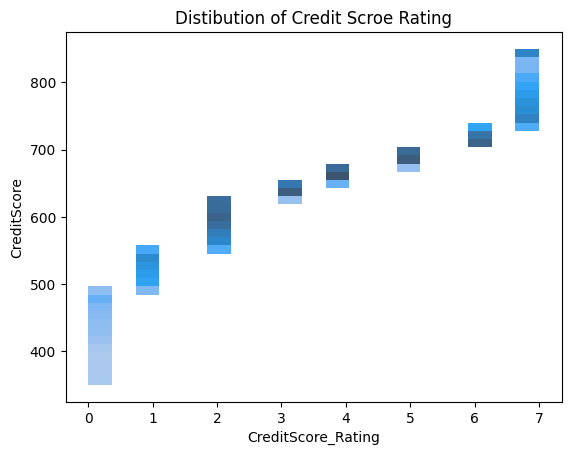

In [21]:
#df.groupby('CreditScore_Rating')['CreditScore'].agg('value_counts')
sns.histplot(x =df['CreditScore_Rating'], y = df["CreditScore"], data = df)
plt.title('Distibution of Credit Scroe Rating')
plt.show()

In [22]:
bin_descriptors = {
    0: 'Very Poor',
    1: 'Poor Credit',
    2: 'Below Average',
    3: 'Average',
    4: 'Above Average',
    5: 'Good',
    6: 'Very Good',
    7: 'Excellent'
}

# Rename values in the 'Category' column
df['CreditScore_Rating'] = df['CreditScore_Rating'].replace(bin_descriptors)

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,EstimatedSalary,Exited,CreditScore_Rating
0,747,15787619,Hsieh,844,France,Male,18,2,160980.03,145936.28,0,Excellent
1,1620,15770309,McDonald,656,France,Male,18,10,151762.74,127014.32,0,Above Average
2,1679,15569178,Kharlamov,570,France,Female,18,4,82767.42,71811.90,0,Below Average
3,2022,15795519,Vasiliev,716,Germany,Female,18,3,128743.80,197322.13,0,Very Good
4,2137,15621893,Bellucci,727,France,Male,18,4,133550.67,46941.41,0,Very Good


## Create bins for Tenure using optbinning

In [23]:
# Define the optimal binning object
optb_tenure = OptimalBinning(name="Tenure", dtype="numerical", solver="cp")

# Fit the binning object to the data
optb_tenure.fit(df['Tenure'], df['Exited'])

#transform the data
binned_data_tenure = optb_tenure.transform(df['Tenure'], metric = "indices")

# Display the binning table
binning_table_tenure = optb_tenure.binning_table.build()
print(binning_table_tenure)

df['Tenure_Binned'] = binned_data_tenure

                 Bin  Count  Count (%)  Non-event  Event  Event rate  \
0       (-inf, 1.50)   1448     0.1448       1121    327    0.225829   
1       [1.50, 5.50)   4058     0.4058       3232    826    0.203549   
2       [5.50, 6.50)    967     0.0967        771    196    0.202689   
3       [6.50, 7.50)   1028     0.1028        851    177    0.172179   
4       [7.50, 8.50)   1025     0.1025        828    197    0.192195   
5        [8.50, inf)   1474     0.1474       1160    314    0.213026   
6            Special      0     0.0000          0      0    0.000000   
7            Missing      0     0.0000          0      0    0.000000   
Totals                10000     1.0000       7963   2037    0.203700   

             WoE            IV            JS  
0      -0.131311  2.593939e-03  3.240097e-04  
1       0.000934  3.538814e-07  4.423518e-08  
2       0.006246  3.765575e-06  4.706962e-07  
3       0.206935  4.133890e-03  5.158162e-04  
4       0.072482  5.269468e-04  6.585394e-05

In [24]:
bin_descriptors = {
    0: 'Very Short',
    1: 'Short',
    2: 'Medium',
    3: 'Long',
    4: 'Very Long',
    5: 'Extremely Long'
    }

# Rename values in the 'Category' column
df['Tenure_Binned'] = df['Tenure_Binned'].replace(bin_descriptors)

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,EstimatedSalary,Exited,CreditScore_Rating,Tenure_Binned
0,747,15787619,Hsieh,844,France,Male,18,2,160980.03,145936.28,0,Excellent,Short
1,1620,15770309,McDonald,656,France,Male,18,10,151762.74,127014.32,0,Above Average,Extremely Long
2,1679,15569178,Kharlamov,570,France,Female,18,4,82767.42,71811.90,0,Below Average,Short
3,2022,15795519,Vasiliev,716,Germany,Female,18,3,128743.80,197322.13,0,Very Good,Short
4,2137,15621893,Bellucci,727,France,Male,18,4,133550.67,46941.41,0,Very Good,Short


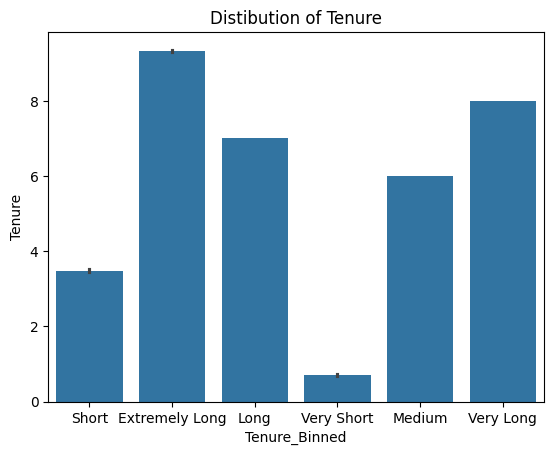

In [25]:
sns.barplot(x =df['Tenure_Binned'], y = df["Tenure"], data = df)
plt.title('Distibution of Tenure')
plt.show()

In [26]:
column = ['CreditScore_Rating', 'Tenure_Binned']
convert_to_categorifcal(df,column)
df.dtypes

RowNumber                int64
CustomerId               int64
Surname                 object
CreditScore              int64
Geography             category
Gender                category
Age                      int64
Tenure                   int64
Balance                float64
EstimatedSalary        float64
Exited                category
CreditScore_Rating    category
Tenure_Binned         category
dtype: object

In [27]:
#check label distribution in target

df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

# Part 1

a.	Sample a subset of the data based on class label

to do this will do downsampling the majority class for imbalanced data

In [28]:
from sklearn.utils import resample

In [29]:
# Separate classes
df_majority = df[df['Exited'] == 0]
df_minority = df[df['Exited'] == 1]

# Downsample the majority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,  # No replacement (random sampling)
                                   n_samples=len(df_minority),  # Match minority size
                                   random_state=42)

# Combine downsampled majority with minority
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Check new class distribution
print(df_balanced['Exited'].value_counts())  # Should be equal now

Exited
0    2037
1    2037
Name: count, dtype: int64


In [30]:
df_balanced.shape

(4074, 13)

## split data in train and test values

to prevent leakage

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = df_balanced[['Geography','Gender', 'Age','Balance','EstimatedSalary','CreditScore_Rating','Tenure_Binned']] #features

y= df_balanced['Exited'] #target variable 

#split train and test 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=42)

In [33]:
X_train.dtypes

Geography             category
Gender                category
Age                      int64
Balance                float64
EstimatedSalary        float64
CreditScore_Rating    category
Tenure_Binned         category
dtype: object

# Implementing PCA

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [35]:
#standardized numerical features

#create instance of scaler
scaler = StandardScaler()

#numerical features
numeric = X_train.select_dtypes(include = ['number']).columns

X_pca = X_train[numeric]
y_pca = y_train

#standardize features
X_pca_scaled = scaler.fit_transform(X_pca)



In [36]:
# Apply PCA
pca = PCA(n_components=3)  # Reduce to 2 dimensions for visualization
X_pca_3 = pca.fit_transform(X_pca_scaled)

In [37]:
# Convert to DataFrame for visualization
df_pca = pd.DataFrame(X_pca_3, columns=['PC1', 'PC2', 'PC3'])
df_pca['Exited'] = y_pca  # Add target variable

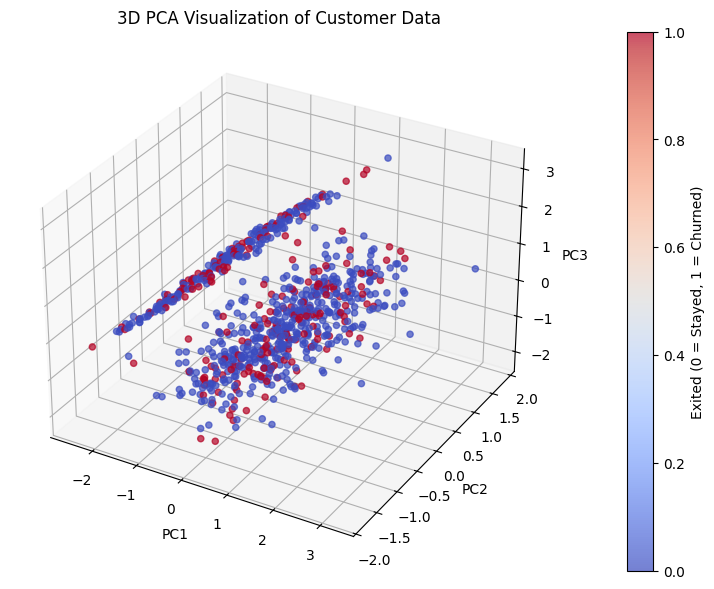

In [38]:
from mpl_toolkits.mplot3d import Axes3D 

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'],
                     c=df_pca['Exited'], cmap='coolwarm', alpha=0.7)

# Labels
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA Visualization of Customer Data')

# Add color bar
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Exited (0 = Stayed, 1 = Churned)')

plt.show()

In [39]:
#PCA with 2 components

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca_2 = pca.fit_transform(X_pca_scaled)

In [40]:
# Convert to DataFrame for visualization
df_pca_2 = pd.DataFrame(X_pca_2, columns=['PC1', 'PC2'])
df_pca_2['Exited'] = y_pca  # Add target variable

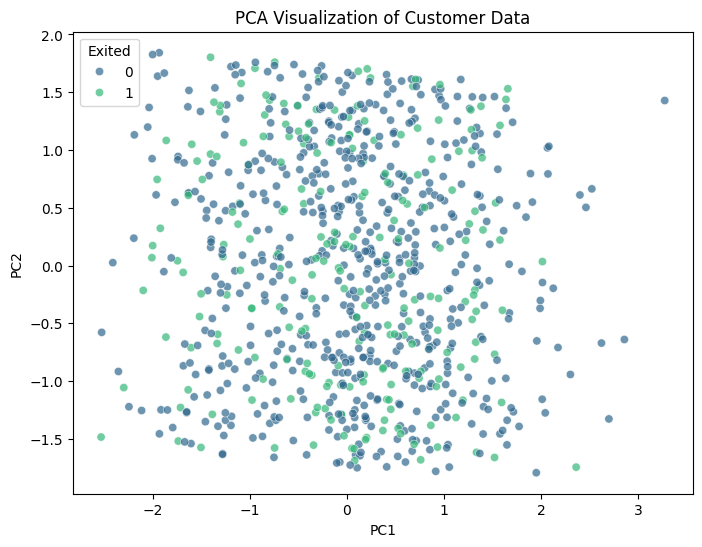

In [41]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca_2, x='PC1', y='PC2', hue='Exited', palette='viridis', alpha=0.7)
plt.title("PCA Visualization of Customer Data")
plt.show()

## Observations

1. PCA( n =3) and PCA (n =2); no clear distinction of groups , no clear pattern observed for those who churned and those who did not
2. Could be an indication that churn vs no churn is influenced by complex non linear relationship which PCA does not capture well
3. Also PCA is heavily dependent on variance between features, it is possible the features that predict churn has little impact on overall variance 


# LDA 

In [42]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [43]:
#create instance of LDA
lda = LinearDiscriminantAnalysis(n_components=1)

#numerical features
numeric = X_train.select_dtypes(include = ['number']).columns

X_lda = X_train[numeric]
y_lda = y_train

#standardize features
X_lda_scaled = scaler.fit_transform(X_lda)

#fit and transform with lda instance
X_lda_1 = lda.fit_transform(X_lda_scaled, y_lda)

In [44]:
# Convert to DataFrame for visualization
df_lda = pd.DataFrame(X_lda_1, columns=['LDA1'])
df_lda['Exited'] = y_lda

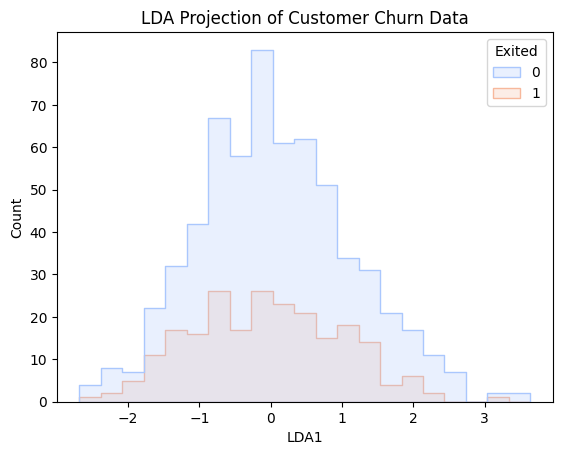

In [45]:
# Histogram to show class separation
sns.histplot(data=df_lda, x='LDA1', hue='Exited', element="step", palette='coolwarm')
plt.title("LDA Projection of Customer Churn Data")
plt.show()

In [46]:
# LDA using encoded categorical features

#categorical = X_train.select_dtypes(include= ['category']).columns

#X_category = X_train[categorical]

In [47]:
#from sklearn.preprocessing import LabelEncoder

#def encode_category(df):
#    le = LabelEncoder()
#    cols = df.select_dtypes(include=['category']).columns.tolist()

#    for col in cols:
#        #create series of encoded values, cast to category data type
#        encoded_vals = le.fit_transform(df[col])
#        df.loc[:,col] = encoded_vals #.astype('category')

#    return df


#def scale_num(df, scaler= None):
#    scaler = StandardScaler()
#    cols = df.select_dtypes(include=['number']).columns.tolist()#

#    if scaler is None:
        
#    for col in cols:
#        encoded_vals = scaler.fit_transform(df[[col]])
#        df.loc[:,col] = encoded_vals #.astype(float)

#    return df

In [48]:
from sklearn.preprocessing import LabelEncoder

def encode_category(df, encoders=None):
    """Encodes categorical columns. If encoders are provided, it uses them;
    otherwise, it fits new ones and returns them."""

    cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    if encoders is None:
        encoders = {}  # Store encoders for each column
        for col in cols:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])  # Fit & transform X_train
            encoders[col] = le  # Save encoder for later use
        return df, encoders  # Return both transformed data & encoders
    
    else:
        for col in cols:
            df[col] = encoders[col].transform(df[col])  # Use existing encoders for X_test
        return df  # Return transformed X_test


def scale_num(df, scaler= None):
    
    cols = df.select_dtypes(include=['number']).columns.tolist()

    if scaler is None:
        scaler = StandardScaler()
        df[cols] = scaler.fit_transform(df[cols])  # Fit & transform X_train
        return df, scaler  # Return both transformed data & scaler
        
    else:
        df[cols] = scaler.transform(df[cols])  # Use existing scaler for X_test
        return df  # Return transformed X_test
    

In [49]:
X_train.dtypes

Geography             category
Gender                category
Age                      int64
Balance                float64
EstimatedSalary        float64
CreditScore_Rating    category
Tenure_Binned         category
dtype: object

In [50]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

In [51]:
#Standardize
X_std = X_train.copy()
X_std, scaler = scale_num(X_std)

#fit OHE on data
encoder.fit(X_std[['Geography','Gender']])

# Transform the 'Geography' and 'Gender' columns
encoded_data = encoder.transform(X_std[['Geography', 'Gender']])

# Convert encoded arrays to DataFrame with appropriate column names
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Geography', 'Gender']))

# Concatenate the original DataFrame with the new encoded DataFrame
X_std = pd.concat([X_std.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Concatenate the original DataFrame with the new encoded DataFrame
#X_std = pd.concat([X_std, encoded_df], axis=1)

# Drop the original 'Geography' and 'Gender' columns if not needed
X_std = X_std.drop(['Geography', 'Gender'], axis=1)

#Encode oridnal category features
X_std, le_encoders = encode_category(X_std)


#preview dataframe
X_std.head()

,Age,Balance,EstimatedSalary,CreditScore_Rating,Tenure_Binned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.372913,-1.338479,-1.432563,1,0,1.0,0.0,0.0,0.0,1.0
1,-0.377634,-1.338479,-1.734642,6,4,1.0,0.0,0.0,0.0,1.0
2,0.279094,0.323458,1.343039,2,3,1.0,0.0,0.0,0.0,1.0
3,2.249279,0.572858,0.955323,1,3,0.0,1.0,0.0,1.0,0.0
4,-1.034362,0.471325,-0.544938,4,3,0.0,0.0,1.0,0.0,1.0


In [52]:
#Standardize
#X_std = scale_num(X_train)

#filter nomical categorical feature geography and gender
#X_std = X_std[['Age','Balance','EstimatedSalary',
#        'CreditScore_Rating','Tenure_Binned']]

#geography_encoded = encoder.fit_transform(X_std[['Geography']])
#gender_encoded = encoder.fit_transform(X_train[['Gender']])

#geography_df = pd.DataFrame(geography_encoded, columns= encoder.get_feature_names_out(['Geography']))
#gender_df = pd.DataFrame(gender_encoded, columns=encoder.get_feature_names_out(['Gender']))

#X_std = pd.concat([X_std, geography_df, gender_df], axis=1)

#Encode oridnal category features
#X_lda_final = encode_category(X_std)


#preview dataframe
#X_lda_final.head()

In [53]:
#fit and transform with lda instance
X_lda_2 = lda.fit_transform(X_std, y_lda)



In [54]:
# Convert to DataFrame for visualization
df_lda_2 = pd.DataFrame(X_lda_2, columns=['LDA1'])
df_lda_2['Exited'] = y_lda



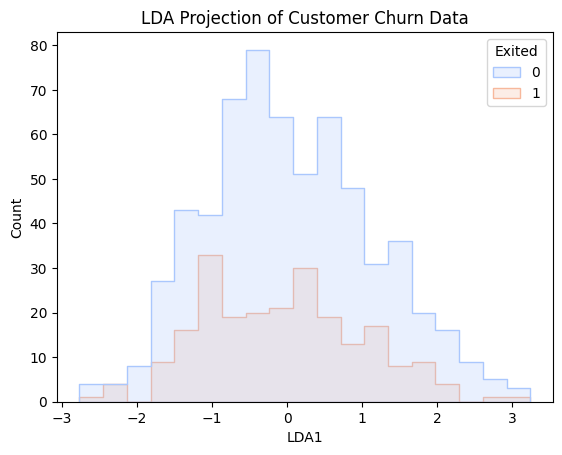

In [55]:
# Histogram to show class separation
sns.histplot(data=df_lda_2, x='LDA1', hue='Exited', element="step", palette='coolwarm')
plt.title("LDA Projection of Customer Churn Data")
plt.show()

# Experiment with tSNE

tSNE can capture more complex relationships

In [56]:
from sklearn.manifold import TSNE

In [57]:
#create instance of tsne
tsne = TSNE(n_components=2, random_state=42)

X_tsne_transfrom = X_std.copy() #create instance of encoded and standardized features

X_tsne = tsne.fit_transform(X_tsne_transfrom) #fit transform values with tsne

In [58]:
#create dataframe to visualize results
df_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
df_tsne['Exited'] = y_train

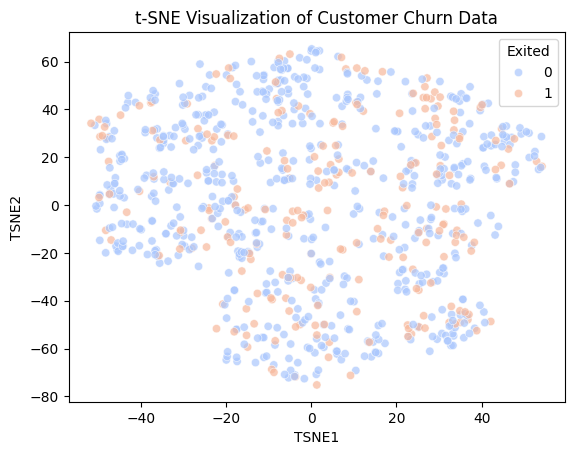

In [59]:
#visualize results
sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='Exited', palette='coolwarm', alpha=0.7)
plt.title("t-SNE Visualization of Customer Churn Data")
plt.show()

# Naives Bayes

1. consider using one hot encoder for geograhy
    Why: label encoder is on the premise of ordinal relatioship. In the case of geography , there is no inherent relationship to suggest one country is higher in order than another.

In [60]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV

#create instance of naives bayes
gnb = GaussianNB()

### Implement RandomSearchCv with Crossfold validation

In [61]:
#create copy of standardized training data
X_train_gnb = X_std.copy()

#define parameters for tunining 
#params = {'var_smoothing': [random.uniform(1e-9, 1e-3)]}
params = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]}  # Randomly sample the 'var_smoothing' parameter


In [62]:
#create instance of RandomSearchCv
random_search = RandomizedSearchCV(estimator=gnb, 
                                   param_distributions=params, 
                                   n_iter=100,
                                   scoring= 'accuracy' , 
                                   cv=6,        # 5-fold cross-validation
                                   random_state=42,  
                                   n_jobs=-1)   # Use all CPU cores


# Fit the random search model
random_search.fit(X_train_gnb, y_train)

# Get the best parameters found
print(f'Best parameters: {random_search.best_params_}')

print(f'Best accuracy: {round(random_search.best_score_,3)}')

c:\Users\On3B3\anaconda3\envs\myenv\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 7 is smaller than n_iter=100. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'var_smoothing': 0.001}
Best accuracy: 0.666


# GridSearchCV

small parameter space does not support more robust tuning
consider the dataset is small, will attempt GridSearchCV and see what it returns

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# Define the cross-validation strategy (e.g., 10-fold cross-validation)
cv_strategy = StratifiedKFold(n_splits=6)

# Perform GridSearchCV with custom cross-validation strategy
grid_search = GridSearchCV(estimator=gnb, 
                           param_grid=params, 
                           cv=cv_strategy,
                           n_jobs= -1,
                           scoring = 'accuracy'
                           )
grid_search.fit(X_train_gnb, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best accuracy score:", round(grid_search.best_score_,3))
print("Best Model:" , grid_search.best_estimator_ )

best_model = grid_search.best_estimator_

Best parameters found: {'var_smoothing': 0.001}
Best accuracy score: 0.666
Best Model: GaussianNB(var_smoothing=0.001)


In [64]:
#best_model = grid_search.best_estimator_

In [65]:
#perform Transformation steps on X_test

#Standardize
X_std_test = X_test.copy()
X_std_test = scale_num(X_std_test,scaler)


# Transform the 'Geography' and 'Gender' columns
encoded_data_test = encoder.transform(X_std_test[['Geography', 'Gender']])

# Convert encoded arrays to DataFrame with appropriate column names
encoded_df_test = pd.DataFrame(encoded_data_test, columns=encoder.get_feature_names_out(['Geography', 'Gender']))

# Concatenate the original DataFrame with the new encoded DataFrame
X_std_test = pd.concat([X_std_test.reset_index(drop=True), encoded_df_test.reset_index(drop=True)], axis=1)


# Drop the original 'Geography' and 'Gender' columns if not needed
X_std_test = X_std_test.drop(['Geography', 'Gender'], axis=1)

#Encode oridnal category features
X_std_test = encode_category(X_std_test, le_encoders)


#preview dataframe
X_std_test.head()

,Age,Balance,EstimatedSalary,CreditScore_Rating,Tenure_Binned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-1.409635,0.452837,0.623389,1,4,0.0,0.0,1.0,1.0,0.0
1,0.466731,0.584205,1.073584,3,2,1.0,0.0,0.0,0.0,1.0
2,-0.002361,-1.338479,1.551430,3,0,1.0,0.0,0.0,0.0,1.0
3,-0.565270,0.774731,-0.234717,5,1,1.0,0.0,0.0,0.0,1.0
4,-0.377634,0.847299,-0.511393,2,0,0.0,1.0,0.0,1.0,0.0


# Model Predictions for Naives Bayes

1. using best model from gridsearch cv
2. Generate performance metrics: accuracy, precision, recall, confusion matrix etc

In [66]:
# Make predictions on the test set
y_pred = best_model.predict(X_std_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Classification Report (Precision, Recall, F1-score)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Test Accuracy: 0.6515
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.70      0.67       408
           1       0.67      0.60      0.63       407

    accuracy                           0.65       815
   macro avg       0.65      0.65      0.65       815
weighted avg       0.65      0.65      0.65       815

Confusion Matrix:
 [[285 123]
 [161 246]]


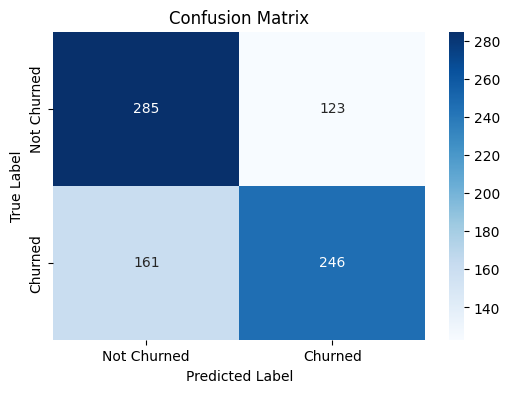

In [67]:
con_matrix = confusion_matrix(y_test, y_pred) #assign matrix results to variable
labels = ['Not Churned', 'Churned']
#Visualize confusion matrix using seaborn
plt.figure(figsize=(6, 4))  # Set figure size
sns.heatmap(con_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [68]:
from sklearn.metrics import roc_curve, auc

# Get probability scores for positive class (Churned/Exited) instead of class predictions
y_probs = best_model.predict_proba(X_std_test)[:, 1] 

# Compute ROC curve
false_pos_rate, true_pos_rate, _ = roc_curve(y_test, y_probs)
roc_auc = auc(false_pos_rate, true_pos_rate)



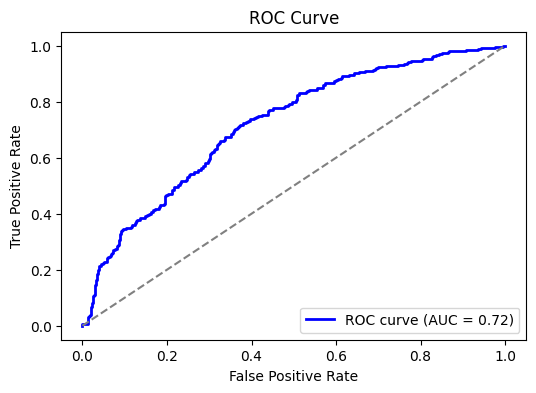

In [69]:
# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(false_pos_rate, true_pos_rate, color='blue', lw=2, label= f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line (random guessing)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

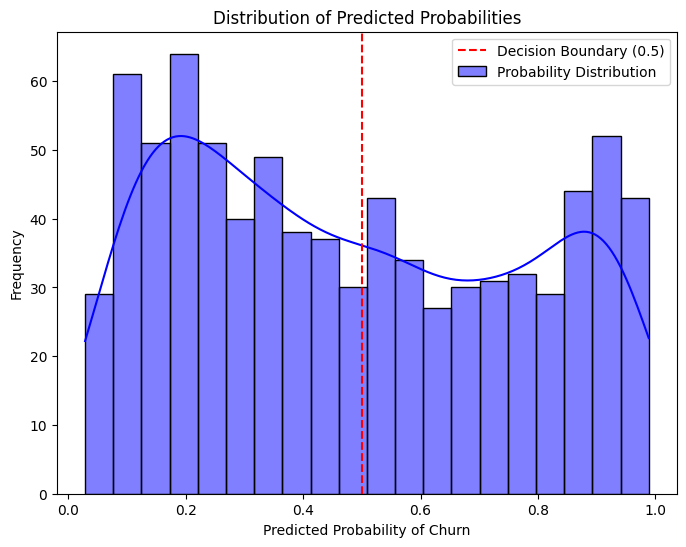

In [70]:
#Plot confidence of class assignments 

y_probs_gnb = best_model.predict_proba(X_std_test)[:,1]  # Select positive class probabilities

# Plot distribution of probabilities
plt.figure(figsize=(8, 6))
sns.histplot(y_probs_gnb, bins=20, kde=True, color='blue', label='Probability Distribution')
plt.axvline(0.5, color='red', linestyle='--', label='Decision Boundary (0.5)')
plt.xlabel("Predicted Probability of Churn")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Probabilities")
plt.legend()
plt.show()

# Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression()

In [72]:
#create copy of standardized training data
X_train_lgr = X_std.copy()

#define parameters for tunining
params_lgr = {'penalty': ['l1', 'l2'],
          'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
          'solver': ['liblinear', 'saga'],
          'max_iter': [100, 200, 500, 1000]
          }

In [73]:
#create instance of RandomSearchCv
random_search_lgr = RandomizedSearchCV(estimator=lgr, 
                                   param_distributions=params_lgr, 
                                   n_iter=100,
                                   scoring= 'accuracy' , 
                                   cv=6,        # 6-fold cross-validation
                                   random_state=42,  
                                   n_jobs=-1)   # Use all CPU cores


# Fit the random search model
random_search_lgr.fit(X_train_lgr, y_train)

# Get the best parameters found
print(f'Best parameters: {random_search_lgr.best_params_}')

print(f'Best accuracy: {round(random_search_lgr.best_score_,3)}')

Best parameters: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 500, 'C': 0.01}
Best accuracy: 0.701


# GridSearchCV

small parameter space does not support more robust tuning
consider the dataset is small, will attempt GridSearchCV and see what it returns

In [74]:
# Define the cross-validation strategy (e.g., 10-fold cross-validation)
cv_strategy = StratifiedKFold(n_splits=6)

# Perform GridSearchCV with custom cross-validation strategy
grid_search_lgr = GridSearchCV(estimator=lgr, 
                           param_grid=params_lgr, 
                           cv=cv_strategy,
                           n_jobs= -1,
                           scoring = 'accuracy'
                           )
grid_search_lgr.fit(X_train_lgr, y_train)

print("Best parameters found:", grid_search_lgr.best_params_)
print("Best accuracy score:", round(grid_search_lgr.best_score_,3))
print("Best Model:" , grid_search_lgr.best_estimator_ )

best_model_lgr = grid_search_lgr.best_estimator_

Best parameters found: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best accuracy score: 0.701
Best Model: LogisticRegression(C=0.01, solver='liblinear')


# Model Predictions for Logistic Regression

1. using best model from gridsearch cv
2. Generate performance metrics: accuracy, precision, recall, confusion matrix etc

In [75]:
X_test_lgr = X_std_test.copy()

# Make predictions on the test set
y_pred_lgr = best_model_lgr.predict(X_test_lgr)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred_lgr)
print(f"Test Accuracy: {accuracy:.4f}")

# Classification Report (Precision, Recall, F1-score)
print("Classification Report:\n", classification_report(y_test, y_pred_lgr))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgr))

Test Accuracy: 0.7031
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.73      0.71       408
           1       0.72      0.67      0.69       407

    accuracy                           0.70       815
   macro avg       0.70      0.70      0.70       815
weighted avg       0.70      0.70      0.70       815

Confusion Matrix:
 [[299 109]
 [133 274]]


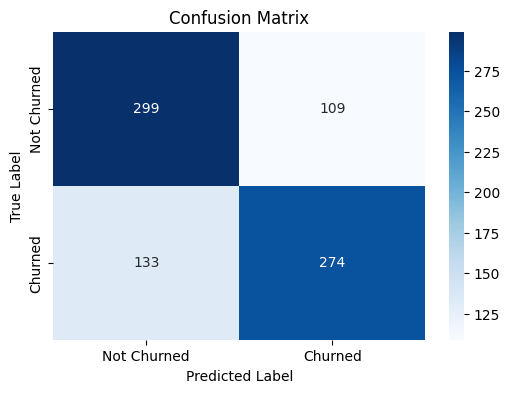

In [76]:
con_matrix_lgr = confusion_matrix(y_test, y_pred_lgr) #assign matrix results to variable
labels = ['Not Churned', 'Churned']

#Visualize confusion matrix using seaborn
plt.figure(figsize=(6, 4))  # Set figure size
sns.heatmap(con_matrix_lgr, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [77]:
#Plot ROC CURVE

# Get probability scores for positive class (Churned/Exited) instead of class predictions
y_probs_lgr = best_model_lgr.predict_proba(X_test_lgr)[:, 1] 

# Compute ROC curve
false_pos_rate_lgr, true_pos_rate_lgr, _ = roc_curve(y_test, y_probs_lgr)
roc_auc_lgr = auc(false_pos_rate_lgr, true_pos_rate_lgr)

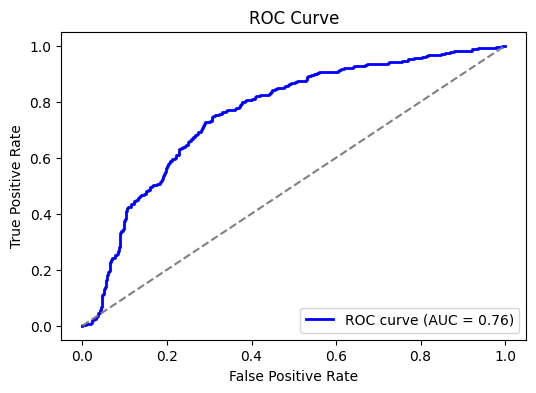

In [78]:
# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(false_pos_rate_lgr, true_pos_rate_lgr, color='blue', lw=2, label= f'ROC curve (AUC = {roc_auc_lgr:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line (random guessing)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

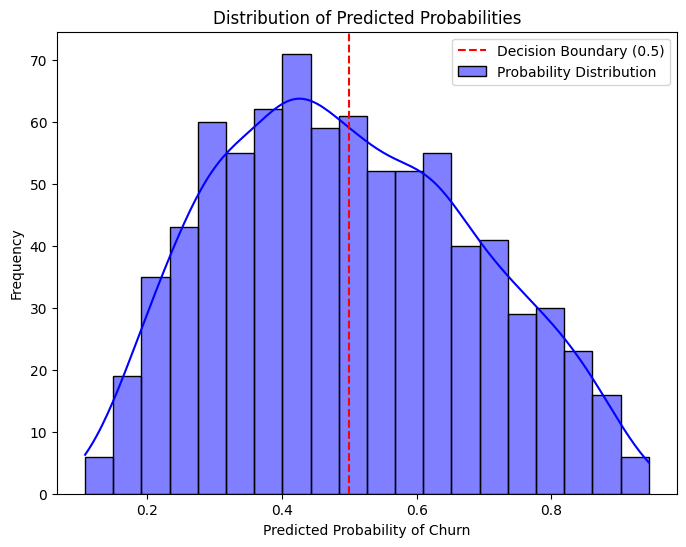

In [79]:
#Plot confidence of class assignments 

y_probs_lgr = best_model_lgr.predict_proba(X_test_lgr)[:,1]  # Select positive class probabilities

# Plot distribution of probabilities
plt.figure(figsize=(8, 6))
sns.histplot(y_probs_lgr, bins=20, kde=True, color='blue', label='Probability Distribution')
plt.axvline(0.5, color='red', linestyle='--', label='Decision Boundary (0.5)')
plt.xlabel("Predicted Probability of Churn")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Probabilities")
plt.legend()
plt.show()

# Support Vector Machine

In [80]:
from sklearn import svm

SVM = svm.SVC(probability=True)

In [81]:
#create copy of standardized training data
X_train_svm = X_std.copy()


params_svm = {
    'C': [0.001, 0.01, 0.1, 1, 1.5, 2],  
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
    'gamma': ['scale', 'auto', 0.001, 0.01],  
    'degree': [2, 3, 4],  
    #'shrinking': [True, False]
    }

In [82]:
#create instance of RandomSearchCv
random_search_svm = RandomizedSearchCV(estimator=SVM, 
                                   param_distributions=params_svm, 
                                   n_iter=100,
                                   scoring= 'accuracy' , 
                                   cv=6,        # 6-fold cross-validation
                                   random_state=42,  
                                   n_jobs=-1)   # Use all CPU cores


# Fit the random search model
random_search_svm.fit(X_train_svm, y_train)

# Get the best parameters found
print(f'Best parameters: {random_search_svm.best_params_}')

print(f'Best accuracy: {round(random_search_svm.best_score_,3)}')

Best parameters: {'kernel': 'rbf', 'gamma': 'auto', 'degree': 3, 'C': 0.1}
Best accuracy: 0.71


# GridSearchCV

consider the dataset is small, will attempt GridSearchCV for comparison

In [83]:
# Define the cross-validation strategy (e.g., 10-fold cross-validation)
cv_strategy = StratifiedKFold(n_splits=6)

# Perform GridSearchCV with custom cross-validation strategy
grid_search_svm = GridSearchCV(estimator=SVM, 
                           param_grid=params_svm, 
                           cv=cv_strategy,
                           n_jobs= -1,
                           scoring = 'accuracy'
                           )
grid_search_svm.fit(X_train_svm, y_train)

print("Best parameters found:", grid_search_svm.best_params_)
print("Best accuracy score:", round(grid_search_svm.best_score_,3))
print("Best Model:" , grid_search_svm.best_estimator_ )

best_model_svm = grid_search_svm.best_estimator_

Best parameters found: {'C': 0.1, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Best accuracy score: 0.71
Best Model: SVC(C=0.1, degree=2, gamma='auto', probability=True)


# Model Predictions for Support Vector Machine

1. using best model from gridsearch cv
2. Generate performance metrics: accuracy, precision, recall, confusion matrix etc

In [84]:
X_test_svm = X_std_test.copy()

# Make predictions on the test set
y_pred_svm = best_model_svm.predict(X_test_svm)

# Calculate Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Test Accuracy: {accuracy_svm:.4f}")

# Classification Report (Precision, Recall, F1-score)
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

Test Accuracy: 0.7092
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.72      0.71       408
           1       0.71      0.70      0.70       407

    accuracy                           0.71       815
   macro avg       0.71      0.71      0.71       815
weighted avg       0.71      0.71      0.71       815

Confusion Matrix:
 [[295 113]
 [124 283]]


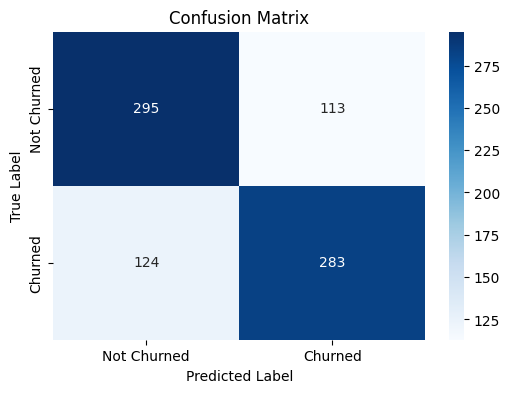

In [85]:
con_matrix_svm = confusion_matrix(y_test, y_pred_svm) #assign matrix results to variable
labels = ['Not Churned', 'Churned']

#Visualize confusion matrix using seaborn
plt.figure(figsize=(6, 4))  # Set figure size
sns.heatmap(con_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [86]:
#Plot ROC CURVE

# Get probability scores for positive class (Churned/Exited) instead of class predictions
y_probs_svm = best_model_svm.predict_proba(X_test_svm)[:, 1] 

# Compute ROC curve
false_pos_rate_svm, true_pos_rate_svm, _ = roc_curve(y_test, y_probs_svm)
roc_auc_svm = auc(false_pos_rate_svm, true_pos_rate_svm)

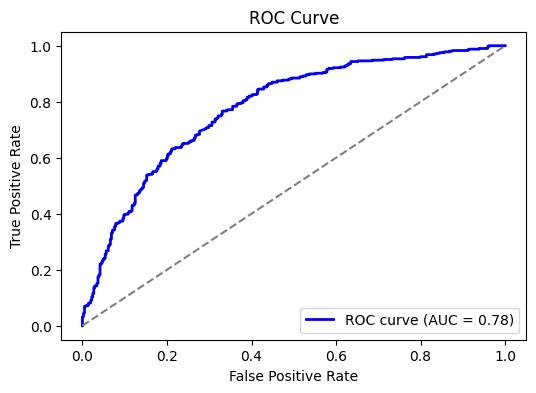

In [87]:
# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(false_pos_rate_svm, true_pos_rate_svm, color='blue', lw=2, label= f'ROC curve (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line (random guessing)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

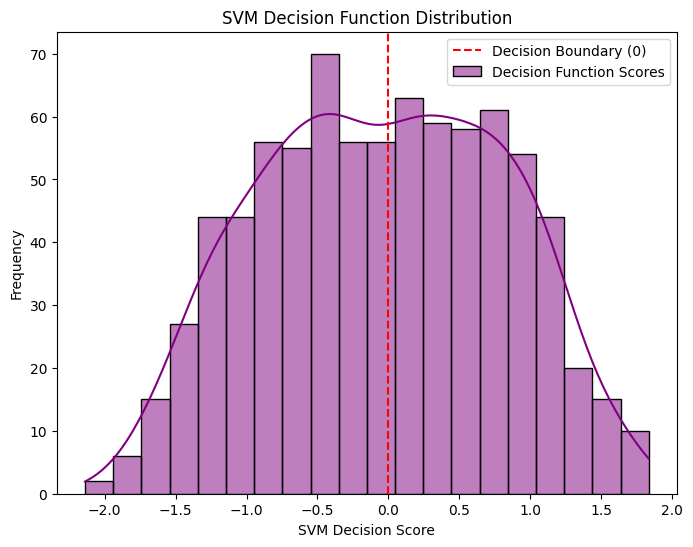

In [88]:
#plot confidence of class assignments 

y_scores = best_model_svm.decision_function(X_test_svm)  # Get raw decision scores

plt.figure(figsize=(8, 6))
sns.histplot(y_scores, bins=20, kde=True, color='purple', label='Decision Function Scores')
plt.axvline(0, color='red', linestyle='--', label='Decision Boundary (0)')
plt.xlabel("SVM Decision Score")
plt.ylabel("Frequency")
plt.title("SVM Decision Function Distribution")
plt.legend()
plt.show()